In [1]:
!pip install fastai duckduckgo_search fastbook

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
(path/'train').ls()

(#2) [Path('/home/positoy/.fastai/data/mnist_sample/train/3'),Path('/home/positoy/.fastai/data/mnist_sample/train/7')]

In [5]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/home/positoy/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/positoy/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/positoy/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/positoy/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/positoy/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/positoy/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/positoy/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/positoy/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/positoy/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/positoy/.fastai/data/mnist_sample/train/3/10091.png')...]

In [6]:
img = Image.open(threes[1])
img

In [7]:
array(img)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254,
        255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
array(img)[4:20,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  11],
       [  0,   0,   0,   0,   0,  16],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]], dtype=uint8)

In [9]:
tensor(img)[4:20,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  11],
        [  0,   0,   0,   0,   0,  16],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0]], dtype=torch.uint8)

In [10]:
tensor_img = tensor(img)
df = pd.DataFrame(tensor_img)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [11]:
# 아이디어1. 픽셀 유사성
# 3과 7의 평균필셀값을 구하고, 검증 이미지가 어느 쪽에 가까운지 확인하면 되지 않을까?
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors),len(three_tensors)

(6265, 6131)

<Axes: >

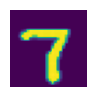

In [12]:
show_image(seven_tensors[0])

In [13]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [14]:
stacked_threes.shape # 28x28 이미지의 갯

torch.Size([6131, 28, 28])

In [15]:
len(stacked_threes.shape) == stacked_threes.ndim # 3. rank-3 tensor

True

<Axes: >

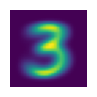

In [16]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

In [17]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(seven_tensors), len(sevens)
stacked_sevens = torch.stack(seven_tensors).float()/255

In [18]:
len(stacked_sevens.shape) == stacked_sevens.ndim

True

<Axes: >

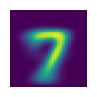

In [19]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

tensor(0.1154) tensor(0.2064)
tensor(0.1669) tensor(0.3170)


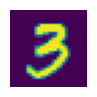

In [20]:
# 이상적인 숫자들과의 거리 측정
v3 = stacked_threes[3]
show_image(v3)

dist_3_abs = (v3 - mean3).abs().mean() # method1. 평균절대차 (L1 Norm)
dist_3_sqr = ((v3 - mean3)**2).mean().sqrt() # method2. 평균제곱근오차 (L2 Norm)
print(dist_3_abs, dist_3_sqr)

dist_7_abs = (v3 - mean7).abs().mean() # method1. 평균절대차 (L1 Norm)
dist_7_sqr = ((v3 - mean7)**2).mean().sqrt() # method2. 평균제곱근오차 (L2 Norm)
print(dist_7_abs, dist_7_sqr)

In [21]:
from torch.nn.functional import *
# 손실함수
print(l1_loss(v3, mean3), mse_loss(v3, mean3).sqrt()) # N1 Norm, N2 Norm = root(Mean Squared Error)
print(l1_loss(v3, mean7), mse_loss(v3, mean7).sqrt())

tensor(0.1154) tensor(0.2064)
tensor(0.1669) tensor(0.3170)


In [22]:
# numpy vs pytorch tensor

data = [[1,2,3],[4,5,6]]
ndata = array(data) # numpy 배열
tdata = tensor(data) # tensor 배열

# 범위선택
tdata[1]
tdata[:,1]
tdata[1,1:3]

# 연산
10*tdata
10+tdata
tdata.type() # LongTesnor
(0.1*tdata).type() # FloatTensor

'torch.FloatTensor'

In [23]:
# 정확도 계산할 검증 데이터 준비
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls().sorted()]).float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls().sorted()]).float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [24]:
# 평가지표 : t두 이미지의 distance 계산 함수
def mnist_distance(a,b):
    return (a-b).abs().mean((-1,-2))

def mse_distance(a,b):
    return ((a-b)**2).mean((-1,-2))

l1 = mnist_distance(mean3, valid_3_tens) # mean3.shape=[28,28] / valid_3_tens.shape=[1010,28,28] / l1=[1010] ; 브로드캐스트 적용
l2 = mse_distance(mean3, valid_3_tens)

print(l1, l1.shape, l1.mean())
print(l2, l2.shape, l2.mean())

# 7 검증이미지의 distance 함수값이 더 높다
print(mnist_distance(mean3, valid_7_tens).mean())
print(mse_distance(mean3, valid_7_tens).mean())

tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]) torch.Size([1010]) tensor(0.1296)
tensor([0.0542, 0.0831, 0.0518,  ..., 0.0742, 0.0539, 0.0521]) torch.Size([1010]) tensor(0.0559)
tensor(0.1590)
tensor(0.0817)


In [25]:
print(mnist_distance(mean7, valid_7_tens).mean())
print(mse_distance(mean7, valid_7_tens).mean())

# 3 검증이미지의 distance 함수값이 더 높다
print(mnist_distance(mean3, valid_3_tens).mean())
print(mse_distance(mean3, valid_3_tens).mean())

tensor(0.1088)
tensor(0.0471)
tensor(0.1296)
tensor(0.0559)


In [34]:
def is_3(x):
    return mnist_distance(mean3, x) < mnist_distance(mean7, x)

def is_7(x):
    return 1 - is_3(x).float().mean()
    
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = is_7(valid_7_tens).float().mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

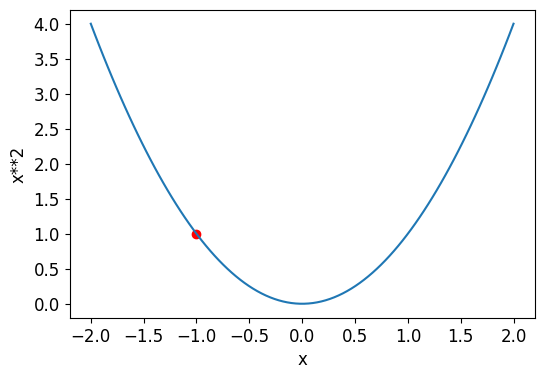

In [77]:
# 확률적 경사 하강법
from notebook import *

def f(x): return x**2

plot_function(f, 'x', 'x**2')
plt.scatter(-1, f(-1), color='red')

In [88]:
xt = tensor(3.).requires_grad_()
yt = tensor([[1,2,3],[4,5,6]])

tensor(3., requires_grad=True)